# Tarefa 1
MO432A - Aprendizado Supervisionado

> Aplicação de métodos de aprendizado supervisionado para resolver problemas de predição

<b>Alunos:</b>


- Andreza - RA: 164213

- Gil - RA: 225323

- Yan - RA: 118982


# Importando as bibliotecas

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Leitura dos dados

In [2]:
df_original = pd.read_csv('solar-flare.csv', header = None, skiprows = 1, sep = ' ')
print("Dados")
print("Número de linhas: {}\nNúmero de colunas: {}".format(df_original.shape[0], df_original.shape[1]))

Dados
Número de linhas: 1066
Número de colunas: 13


<h3>Impressão das primeiras e últimas amostras do conjunto de dados</h3>

In [3]:
df_original.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0


In [4]:
df_original.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
1061,H,S,X,1,2,1,1,1,1,1,0,0,0
1062,H,S,X,2,2,1,1,2,1,1,0,0,0
1063,C,S,O,1,2,1,2,2,1,1,0,0,0
1064,H,R,X,1,2,1,1,2,1,1,0,0,0
1065,B,X,O,1,1,1,1,2,1,1,0,0,0


Para facilitar a manipulação dos dados, separamos a coluna composta por todos os dados em 13 colunas de nomes correspondentes a seus significados. O significado de cada valor foi retirado da fonte da base, disponível em https://archive.ics.uci.edu/ml/datasets/Solar+Flare



In [5]:
df_original = df_original.rename(
                {0: "class_code", 1: "largest_spot_size", 2: "spot_distribution",
                 3: "activity", 4: "evolution", 5: "24_flare_activity", 6: "historically_complex",
                 7: "region_become_hcomplex", 8: "area", 9: "largest_spot_area", 10: "c_class",
                 11: "m_class", 12: "x_class"}, axis='columns')

df_original.head(-10)

,class_code,largest_spot_size,spot_distribution,activity,evolution,24_flare_activity,historically_complex,region_become_hcomplex,area,largest_spot_area,c_class,m_class,x_class
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,D,H,O,1,3,1,2,2,1,1,0,0,0
1052,E,A,I,2,2,1,2,2,1,1,0,0,0
1053,D,S,O,1,3,1,1,2,1,1,0,0,0
1054,H,S,X,1,1,1,1,1,1,1,0,0,0


# Conversão os atributos categóricos para numéricos
Convertemos as três primeiras colunas categóricas para numéricas utilizando a função get_dummies do panda.

In [6]:
# Transforma três primeiras colunas de categóricas para numéricas
columns_categorical = df_original.columns[:3]
df_converted = pd.get_dummies(df_original, columns=columns_categorical)
column_order = [
        'class_code_B', 'class_code_C', 'class_code_D', 'class_code_E', 'class_code_F',
        'class_code_H', 'largest_spot_size_A', 'largest_spot_size_H', 'largest_spot_size_K',
        'largest_spot_size_R', 'largest_spot_size_S', 'largest_spot_size_X', 'spot_distribution_C',
        'spot_distribution_I', 'spot_distribution_O', 'spot_distribution_X', 'activity',
        'evolution', '24_flare_activity', 'historically_complex', 'region_become_hcomplex',
        'area', 'largest_spot_area', 'c_class', 'm_class', 'x_class']
df_converted = df_converted[column_order]

In [7]:
columns_categorical

Index(['class_code', 'largest_spot_size', 'spot_distribution'], dtype='object')

<h3>Imprimir primeiras e últimas linhas do conjunto após conversão dos atributos</h3>

In [8]:
df_converted.head()

,class_code_B,class_code_C,class_code_D,class_code_E,class_code_F,class_code_H,largest_spot_size_A,largest_spot_size_H,largest_spot_size_K,largest_spot_size_R,...,activity,evolution,24_flare_activity,historically_complex,region_become_hcomplex,area,largest_spot_area,c_class,m_class,x_class
0,0,0,0,0,0,1,1,0,0,0,...,1,3,1,1,1,1,1,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,1,3,1,1,2,1,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,3,1,1,2,1,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,2,1,1,1,1,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,1,1,1,2,1,1,0,0,0


In [20]:
df_converted.tail()

,class_code_B,class_code_C,class_code_D,class_code_E,class_code_F,class_code_H,largest_spot_size_A,largest_spot_size_H,largest_spot_size_K,largest_spot_size_R,...,activity,evolution,24_flare_activity,historically_complex,region_become_hcomplex,area,largest_spot_area,c_class,m_class,x_class
1061,0,0,0,0,0,1,0,0,0,0,...,1,2,1,1,1,1,1,0,0,0
1062,0,0,0,0,0,1,0,0,0,0,...,2,2,1,1,2,1,1,0,0,0
1063,0,1,0,0,0,0,0,0,0,0,...,1,2,1,2,2,1,1,0,0,0
1064,0,0,0,0,0,1,0,0,0,1,...,1,2,1,1,2,1,1,0,0,0
1065,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,1,1,0,0,0


# Centering and scaling
Convertemos os dados com a função StandarScaler do sklearn,estandarizando os dados ao remover a média e ajustar para variância unitária.

In [10]:
X = df_converted.iloc[:, :-3]
y = df_converted.loc[:, 'c_class':'x_class']

X = StandardScaler().fit_transform(X)
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1066, 23)
y shape: (1066, 3)


# PCA
Abaixo aplicamos PCA para reduzir a dimensionalidade dos dados. Plotamos a variância agregada para cada componente. Verificamos que com cerca de 16 componentes já adquirimos 100% da variância. Para capturarmos 90% da variância dos dados, necessitamos selecionar 13 componentes, como demonstrado abaixo.

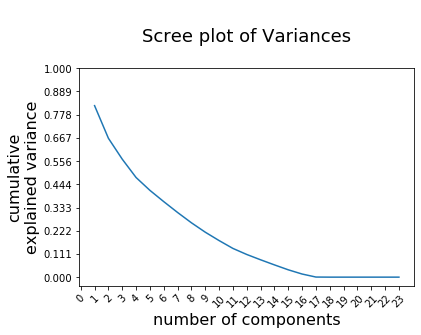

In [11]:
pca = PCA().fit(X)
plt.plot(range(1,24), 1- np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components', fontsize=16)
plt.xticks(range(0, 24),rotation=45)
plt.yticks(np.linspace(0, 1, 10, endpoint=True))
plt.ylabel('cumulative\nexplained variance', fontsize=16)
plt.title("\nScree plot of Variances\n", fontsize=18)
plt.show()

In [12]:
pca = PCA(n_components = 0.9,  svd_solver = 'full' )
X_pca = pca.fit_transform(X)
print("Conjunto de dados após transformação PCA:")
print('X shape:', X_pca.shape)
print('y shape:', y.shape)
print('O número de componentes para 90% da variância é:', X_pca.shape[1])

Conjunto de dados após transformação PCA:
X shape: (1066, 13)
y shape: (1066, 3)
O número de componentes para 90% da variância é: 13


# Validação cruzada e regressão linear
Separamos cada coluna de output para rodar as regressões lineares para cada output features, dado os input features com os 13 componentes do pca.

In [13]:
# Separa as três colunas de target para as regressões separadas
y_c_class = y.iloc[:, 0]
y_m_class = y.iloc[:, 1]
y_x_class = y.iloc[:, 2]

### Função para treinar modelo

In [14]:
# Treina e avalia regressor para 5 interações
def train_evaluate_model(X, y):
    scores_rmse=[]
    scores_mae=[]
    scoring = ['neg_mean_squared_error','neg_mean_absolute_error']
    for i in range(5):
        # cria separação 70/30 (train/test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        
        model = LinearRegression()
        # treina modelo
        model = model.fit(X_train, y_train)
        # avalia modelo
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred,)
        rmse = mean_squared_error(y_test, y_pred, squared = False)
        print("iteração #{}\nRMSE: {:.5f} | MAE: {:.5f}".format(i, rmse, mae))
        scores_rmse.append(rmse)
        scores_mae.append(mae)
        print()
    print('MÉDIA DOS RMSE: {:.5f}'.format(np.mean(scores_rmse)))
    print('MÉDIA DOS MAE: {:.5f}'.format(np.mean(scores_mae)))

### Fitting classe C

In [19]:
print("Treinamentos e métricas para a predição da classe C")
train_evaluate_model(X, y_c_class)

Treinamentos e métricas para a predição da classe C
iteração #0
RMSE: 0.72797 | MAE: 0.36137

iteração #1
RMSE: 0.80189 | MAE: 0.41874

iteração #2
RMSE: 0.85328 | MAE: 0.44448

iteração #3
RMSE: 0.89219 | MAE: 0.46576

iteração #4
RMSE: 0.88689 | MAE: 0.42178

MÉDIA DOS RMSE: 0.83244
MÉDIA DOS MAE: 0.42242


### Fitting classe M

In [16]:
print("Treinamentos e métricas para a predição da classe M")
scores=train_evaluate_model(X, y_m_class)

Treinamentos e métricas para a predição da classe M
iteração #0
RMSE: 0.32746 | MAE: 0.10537

iteração #1
RMSE: 0.34579 | MAE: 0.10030

iteração #2
RMSE: 0.24559 | MAE: 0.11400

iteração #3
RMSE: 0.20572 | MAE: 0.07733

iteração #4
RMSE: 0.34118 | MAE: 0.10065

MÉDIA DOS RMSE: 0.29315
MÉDIA DOS MAE: 0.09953


### Fitting classe X

In [18]:
print("Treinamentos e métricas para a predição da classe X")
scores=train_evaluate_model(X, y_x_class)

Treinamentos e métricas para a predição da classe X
iteração #0
RMSE: 0.11997 | MAE: 0.01542

iteração #1
RMSE: 0.13331 | MAE: 0.01902

iteração #2
RMSE: 0.12997 | MAE: 0.01842

iteração #3
RMSE: 0.07991 | MAE: 0.01835

iteração #4
RMSE: 0.13306 | MAE: 0.01846

MÉDIA DOS RMSE: 0.11924
MÉDIA DOS MAE: 0.01793


# Conclusões

Percebemos que para duas classes, em uma das interações de treinamento e teste do modelo temos um erro enorme. Isso acabou elevando a média do erro, tanto para a métrica de RMSE quando a do MAE. Quando rodamos novamente o treinamento, obtivemos erros baixos em todas as classes preditas. Isso é um indicativo que uma regressão linear talvez não sirva para a previsão das classes.